# Bitcoin Price Prediction - Group 19

Group Members:

Anıl Ozan Ayhan

Ahmet Kemal Ceylan

## Introduction
Bitcoin is a decentralized digital currency created over a decade ago by Satoshi
Nakamoto. The name Satoshi is a pseudonym used by the team or the person
that sent out the first whitepaper containing the idea of blockchain technology
being used in a way to secure digital money. Bitcoin is decentralized, meaning it
doesn’t belong to any individual, company or government. There are millions of
people “mining” bitcoin. These miners are keeping the blockchain running and
creating new bitcoin by using computational power to verify transactions
between users. 
Our purpose is to gather past data and analyze it considering many different
variables. BTC and other cryptocurrencies are very volatile currencies, thus it is
very challenging for investors to predict even the next day price of bitcoin. This
makes our project essential for an investor to know when to invest. After
collecting the data, we can detect what BTC price correlates with and hopefully
we will be able to predict future price action to a certain extent.

### Utilized Datasets
Our main dataset is a kaggle dataset that includes the open, high, low, close, adj close, volume information.
There are a total of 2755 entries in the dataset with no missing values.

https://www.kaggle.com/datasets/surajjha101/analyzing-and-prediction-of-bitcoin-pricing

Data types are float, int and one object(date).



The other 3 datasets are:

https://www.kaggle.com/mczielinski/bitcoin-historical-data

https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory

https://www.kaggle.com/prasoonkottarathil/btcinusd

We describe their uses, data types and other specifics in the next parts.


In [ ]:
from google.colab import drive
drive.mount("./drive", force_remount=True)

# to be used as a prefix for all file I/O
path_prefix = "./drive/My Drive/CS 210 Final Project"

Mounted at ./drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import plotly.express as px
import seaborn as sns
from scipy import stats
from scipy import special
from plotly.subplots import make_subplots
from ipywidgets import interact
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
! pip install pandas_ta
import pandas_ta as ta
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 7.9 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=ba4254e9fb8be5fee5f0dfafb138c8dadda42fe59f0adf048ed8e9511247dbc2
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [ ]:
fname = "BTC-USD.csv"

df = pd.read_csv(join(path_prefix, fname))

##### Data Analysis


#### Exploratory Data Analysis

```
1 Visualization of descriptive statistics of the dataset; visualize price trends based on time series and
volume.
2 Visualize each feature separately based on time series
and/or close prices with respect to volumes and compare distributions or centrality metrics of these
features for different open/close prices)
3 Analysis of the highest and lowest price of all time with respect to volume
4 Analyzing how high & low prices change with respect to time
5 Comparison of open, close, high and low prices for selected time range and/or volume
6 Introduction of at least four new features from additional datasets and visual explanations of them
7 For both existing and new features, and usage of spatial visualization examples (as much as possible)
are expected.


1-2) Visualization of descriptive statistics of the dataset; visualize price trends based on time series and
volume.

First, we look at some basic info about our dataset.

In [ ]:
print(df.describe)
df.dtypes

<bound method NDFrame.describe of             Date          Open          High           Low         Close  \
0     2014-09-17    465.864014    468.174011    452.421997    457.334015   
1     2014-09-18    456.859985    456.859985    413.104004    424.440002   
2     2014-09-19    424.102997    427.834991    384.532013    394.795990   
3     2014-09-20    394.673004    423.295990    389.882996    408.903992   
4     2014-09-21    408.084991    412.425995    393.181000    398.821014   
...          ...           ...           ...           ...           ...   
2750  2022-03-29  47100.437500  48022.289063  47100.437500  47465.730469   
2751  2022-03-30  47456.898438  47655.148438  46746.210938  47062.664063   
2752  2022-03-31  47062.148438  47512.027344  45390.539063  45538.675781   
2753  2022-04-01  45554.164063  46616.242188  44403.140625  46281.644531   
2754  2022-04-02  46168.101563  47003.429688  46157.980469  46508.101563   

         Adj Close       Volume  
0       457.334015 

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

What do our first and last elements look like

In [ ]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
2750,2022-03-29,47100.437500,48022.289063,47100.437500,47465.730469,47465.730469,31397059069
2751,2022-03-30,47456.898438,47655.148438,46746.210938,47062.664063,47062.664063,29333883962
2752,2022-03-31,47062.148438,47512.027344,45390.539063,45538.675781,45538.675781,33327427106
2753,2022-04-01,45554.164063,46616.242188,44403.140625,46281.644531,46281.644531,38162644287
2754,2022-04-02,46168.101563,47003.429688,46157.980469,46508.101563,46508.101563,35441143808


In [ ]:
df.isna().sum() / df.shape[0]

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

The code above shows us how many NaN's there are and in this dataset, there are none.

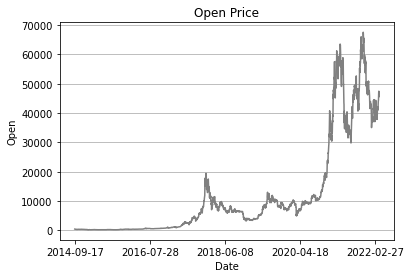

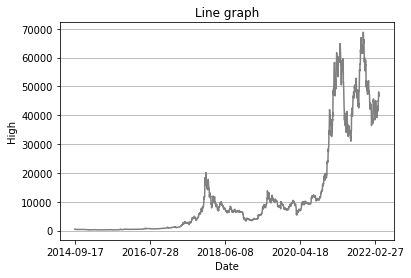

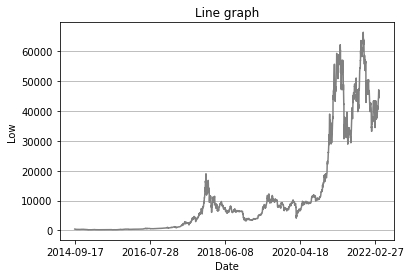

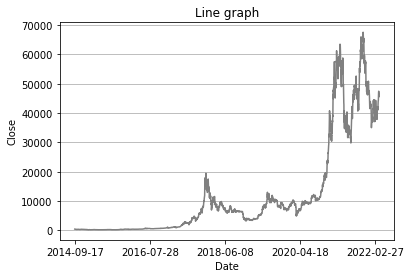

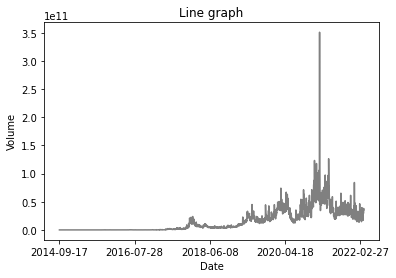

In [ ]:
# date to open
x = df["Date"]
y = df["Open"]
plt.title("Open Price")
plt.xlabel("Date")
plt.ylabel("Open")
plt.plot(x, y, color ="grey")
plt.xticks(np.arange(0,2755,680))
plt.grid(axis='y');
plt.show()
# date to High
x = df["Date"]
y = df["High"]
plt.title("Line graph")
plt.xlabel("Date")
plt.ylabel("High")
plt.plot(x, y, color ="grey")
plt.xticks(np.arange(0,2755,680))
plt.grid(axis='y');
plt.show()
# date to Low
x = df["Date"]
y = df["Low"]
plt.title("Line graph")
plt.xlabel("Date")
plt.ylabel("Low")
plt.plot(x, y, color ="grey")
plt.xticks(np.arange(0,2755,680))
plt.grid(axis='y');
plt.show()
# date to close
x = df["Date"]
y = df["Close"]
# plotting
plt.title("Line graph")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(x, y, color ="grey")
plt.xticks(np.arange(0,2755,680))
plt.grid(axis='y');
plt.show()
# date to v olume
x = df["Date"]
y = df["Volume"]
plt.title("Line graph")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.plot(x, y, color ="grey")
plt.xticks(np.arange(0,2755,680))

plt.show()


Here, we see that all graphs except date/volume look similar. This happens because the time(x axis) holds way too much data. 2755 days to be exact. We can compare these values with each other in order to get a better result or we can just limit the time interval.  We wont be analysing Adj Close as it is the same with Close in our dataset.

3) Analysis of highest and lowest prices of all time with respect to volume

In [ ]:
dfhigh = df
dfhigh = dfhigh.drop(["Low","Date","Open","Close","Adj Close"],axis=1)
hi = dfhigh["High"].max()
print(dfhigh[dfhigh["High"]==hi])


dflow = df
dflow = dflow.drop(["High","Date","Open","Close","Adj Close"],axis=1)
lo = dflow["Low"].min()
print(dflow[dflow["Low"]==lo])


           High       Volume
2611  68789.625  48730828378
            Low    Volume
119  171.509995  97638704


The day BTC reached its peak, at least 708.410 BTC was traded(volume / high)

The day BTC was at its lowest, at most 570.986  BTC was traded(volume / low)


4-5) Analyzing how high & low prices change with respect to time

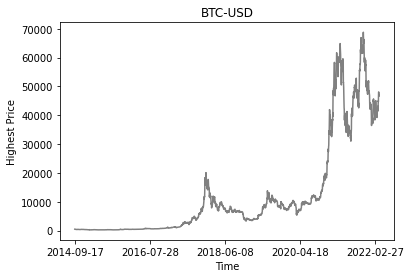

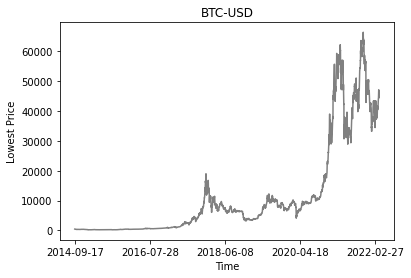

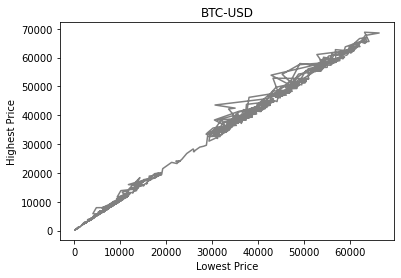

In [ ]:
# data to be plotted
x = df["Date"]
y = df["High"]
# plotting
plt.title("BTC-USD")
plt.xlabel("Time")
plt.ylabel("Highest Price")
plt.plot(x, y, color ="grey")
plt.xticks(np.arange(0,2755,680))
plt.show()


# data to be plotted
x = df["Date"]
y = df["Low"]
# plotting
plt.title("BTC-USD")
plt.xlabel("Time")
plt.ylabel("Lowest Price")
plt.plot(x, y, color ="grey")
plt.xticks(np.arange(0,2755,680))
plt.show()

# data to be plotted
x = df["Low"]
y = df["High"]
# plotting
plt.title("BTC-USD")
plt.xlabel("Lowest Price")
plt.ylabel("Highest Price")
plt.plot(x, y, color ="grey")
plt.show()

As we can see above, graph of Highest Price over time and graph of Lowest Price seem very similar but some minimal differencies. This means that highest and lowest prices of a day have not very big effect to graph of 7 years BTC-USD price. When we look at the graph of Highest Price over Lowest Price, it can be seen that several days have big changes in a day. Also we can state that in between 20000 and 30000, the graph is thinner because there are not many values in this domain.

6)  Introduction of at least four new features from additional datasets and visual explanations of them

In [ ]:
fname2 = "BTC-Hourly.csv"
df2 = pd.read_csv(join(path_prefix, fname2))
print(df2.describe)
print(df2.dtypes)
df2.isna().sum() / df.shape[0]

<bound method NDFrame.describe of              unix                 date   symbol      open      high       low  \
0      1646092800  2022-03-01 00:00:00  BTC/USD  43221.71  43626.49  43185.48   
1      1646089200  2022-02-28 23:00:00  BTC/USD  43085.30  43364.81  42892.37   
2      1646085600  2022-02-28 22:00:00  BTC/USD  41657.23  44256.08  41650.29   
3      1646082000  2022-02-28 21:00:00  BTC/USD  41917.09  41917.09  41542.60   
4      1646078400  2022-02-28 20:00:00  BTC/USD  41361.99  41971.00  41284.11   
...           ...                  ...      ...       ...       ...       ...   
33254  1526378400  2018-05-15 10:00:00  BTC/USD   8708.32   8865.00   8695.11   
33255  1526374800  2018-05-15 09:00:00  BTC/USD   8728.49   8754.40   8701.35   
33256  1526371200  2018-05-15 08:00:00  BTC/USD   8739.00   8750.27   8660.53   
33257  1526367600  2018-05-15 07:00:00  BTC/USD   8740.99   8766.00   8721.11   
33258  1526364000  2018-05-15 06:00:00  BTC/USD   8733.86   8796.68   8707.

unix          0.0
date          0.0
symbol        0.0
open          0.0
high          0.0
low           0.0
close         0.0
Volume BTC    0.0
Volume USD    0.0
dtype: float64

These codes show us some basic details about our dataset and check if there are any NaN's in the set.

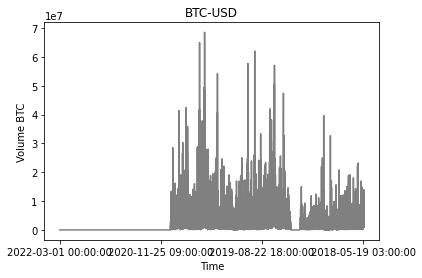

In [ ]:
# data to be plotted
x = df2["date"]
y = df2["Volume BTC"]
# plotting
plt.title("BTC-USD")
plt.xlabel("Time")
plt.ylabel("Volume BTC")
plt.plot(x, y, color ="grey")
plt.xticks(np.arange(0,33259,11055))
plt.show()

Now we have a new feature named Volume BTC from additional dataset. The data consist of values for every minute throughout 2017. Since the dataset is very  big, we should use this data with some limitations.

In [ ]:
ethname = "coin_Ethereum.csv"
df3 = pd.read_csv(join(path_prefix, ethname))
print(df3.info)
df3.dtypes

<bound method DataFrame.info of        SNo      Name Symbol                 Date         High          Low  \
0        1  Ethereum    ETH  2015-08-08 23:59:59     2.798810     0.714725   
1        2  Ethereum    ETH  2015-08-09 23:59:59     0.879810     0.629191   
2        3  Ethereum    ETH  2015-08-10 23:59:59     0.729854     0.636546   
3        4  Ethereum    ETH  2015-08-11 23:59:59     1.131410     0.663235   
4        5  Ethereum    ETH  2015-08-12 23:59:59     1.289940     0.883608   
...    ...       ...    ...                  ...          ...          ...   
2155  2156  Ethereum    ETH  2021-07-02 23:59:59  2155.596496  2021.824808   
2156  2157  Ethereum    ETH  2021-07-03 23:59:59  2237.567155  2117.590013   
2157  2158  Ethereum    ETH  2021-07-04 23:59:59  2384.286857  2190.837703   
2158  2159  Ethereum    ETH  2021-07-05 23:59:59  2321.922836  2163.041394   
2159  2160  Ethereum    ETH  2021-07-06 23:59:59  2346.294874  2197.919385   

             Open        Close 

SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

In the Ethereum dataset, we find another feature called Marketcap. This value shows us the amount we would get if we multiplied the current price of Ethereum with the amount of Ethereum circulating. Marketcap allows investors to see the relative size of one company versus another.

7) Visualization examples

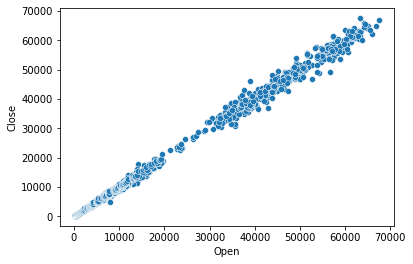

In [ ]:
sns.scatterplot(x="Open", y="Close", data=df)

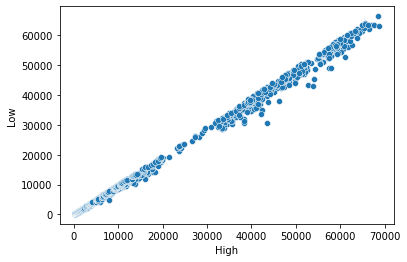

In [ ]:
sns.scatterplot(x="High", y="Low", data=df)

#### Statistical Analysis & Hypothesis Testing
```
1 Statistical tests to check how (or if) the volume and close features (in both single and combined manner) contributes 
to opening price of the next day.
2 Statistical tests to check if significant differences exist between different months of a single year and same month
 of different years
3 Statistical tests on selected features (e.g. investigate whether there exist significant statistical differences 
between high and low prices with respect to open and close prices of the same day)
4 Statistical tests to check how the close and volume features affects metrics like open prices of next day, and
 how open price affects high and low prices of that day 2
5 Utilizing at least four new features using extra datasets in hypothesis testing
```


In [ ]:
fname = "BTC-USD.csv"

df = pd.read_csv(join(path_prefix, fname))

1) Statistical tests to check how (or if) the volume and close features (in both single and combined manner) contributes 
to opening price of the next day.

In [ ]:
dfdatesiz = df.drop("Date", axis=1)

In [ ]:
dfdatesiz.head()
dfdatesiz.dropna(inplace=True)
features = ['Volume' ,'Close']
output_label = 'Open'
x_train, x_test, y_train, y_test = train_test_split(dfdatesiz[features], dfdatesiz[output_label], test_size = 0.2,random_state=0)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.99576


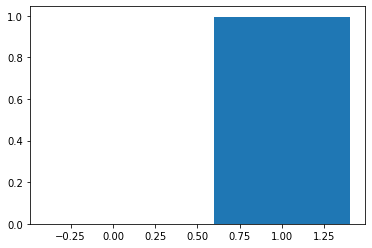

In [ ]:
from sklearn.datasets import make_regression
model = LinearRegression()
model.fit(x_test, y_test)
importance = model.coef_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

2)  Statistical tests to check if significant differences exist between different months of a single year and same month
 of different years 

In [ ]:
df.info

<bound method DataFrame.info of             Date          Open          High           Low         Close  \
0     2014-09-17    465.864014    468.174011    452.421997    457.334015   
1     2014-09-18    456.859985    456.859985    413.104004    424.440002   
2     2014-09-19    424.102997    427.834991    384.532013    394.795990   
3     2014-09-20    394.673004    423.295990    389.882996    408.903992   
4     2014-09-21    408.084991    412.425995    393.181000    398.821014   
...          ...           ...           ...           ...           ...   
2750  2022-03-29  47100.437500  48022.289063  47100.437500  47465.730469   
2751  2022-03-30  47456.898438  47655.148438  46746.210938  47062.664063   
2752  2022-03-31  47062.148438  47512.027344  45390.539063  45538.675781   
2753  2022-04-01  45554.164063  46616.242188  44403.140625  46281.644531   
2754  2022-04-02  46168.101563  47003.429688  46157.980469  46508.101563   

         Adj Close       Volume  
0       457.334015   

In [ ]:
df_14ekim = df.iloc[14:45]
df_15ekim = df.iloc[379:410]
df_16ekim = df.iloc[745:776]
df_17ekim = df.iloc[1110:1141]
df_18ekim = df.iloc[1475:1506]
df_19ekim = df.iloc[1840:1871]
df_20ekim = df.iloc[2206:2237]
df_21ekim = df.iloc[2571:2602]

In [ ]:
def calculate(x,y,year):
  if ((x-y)/x)*100 > 0:
    print("This is equal to a",((x-y)/x)*100,"% drop in price throughout October ",year)
    year= year+1
  else:
    print("This is equal to a",abs(((x-y)/x)*100),"% increase in price throughout October ",year)
    year = year+1
  return year

year=2014
a = df_14ekim["Open"].values[0]
b = df_14ekim["Open"].values[30]
a2= df_15ekim["Open"].values[0]
b2= df_15ekim["Open"].values[30]
a3= df_16ekim["Open"].values[0]
b3= df_16ekim["Open"].values[30]
a4= df_17ekim["Open"].values[0]
b4= df_17ekim["Open"].values[30]
a5= df_18ekim["Open"].values[0]
b5= df_18ekim["Open"].values[30]
a6= df_19ekim["Open"].values[0]
b6= df_19ekim["Open"].values[30]
a7= df_20ekim["Open"].values[0]
b7= df_20ekim["Open"].values[30]
a8= df_21ekim["Open"].values[0]
b8= df_21ekim["Open"].values[30]

year=calculate(a,b,year)
year=calculate(a2,b2,year)
year=calculate(a3,b3,year)
year=calculate(a4,b4,year)
year=calculate(a5,b5,year)
year=calculate(a6,b6,year)
year=calculate(a7,b7,year)
year=calculate(a8,b8,year)

print("Therefore, there are no correlations between the same months of different years.")

This is equal to a 10.94864291363977 % drop in price throughout October  2014
This is equal to a 39.197638931523535 % increase in price throughout October  2015
This is equal to a 15.200293241992588 % increase in price throughout October  2016
This is equal to a 41.256615230195465 % increase in price throughout October  2017
This is equal to a 4.272904368113382 % drop in price throughout October  2018
This is equal to a 10.87671907650696 % increase in price throughout October  2019
This is equal to a 25.485987814262895 % increase in price throughout October  2020
This is equal to a 41.15720428420821 % increase in price throughout October  2021
Therefore, there are no correlations between the same months of different years.


3) Statistical tests on selected features (e.g. investigate whether there exist significant statistical differences 
between high and low prices with respect to open and close prices of the same day)


In [ ]:
crosstab_df=pd.crosstab(df["Close"], df["High"])
alpha = 0.05
chi2_test_stat, p, dof, expected_freqs= stats.chi2_contingency(crosstab_df)

if p>alpha:
  result = " independent"
else:
  result =" not independent"
print(f"Close and High are{result}")

Close and High are independent


In [ ]:
crosstab_df=pd.crosstab(df["Close"], df["Low"])
alpha = 0.05
chi2_test_stat, p, dof, expected_freqs= stats.chi2_contingency(crosstab_df)

if p>alpha:
  result = " independent"
else:
  result =" not independent"
print(f"Close and Low are{result}")

Close and Low are independent


In [ ]:
crosstab_df=pd.crosstab(df["Open"], df["Low"])
alpha = 0.05
chi2_test_stat, p, dof, expected_freqs= stats.chi2_contingency(crosstab_df)

if p>alpha:
  result = " independent"
else:
  result =" not independent"
print(f"Open and Low are{result}")

Open and Low are independent


In [ ]:
crosstab_df=pd.crosstab(df["Open"], df["High"])
alpha = 0.05
chi2_test_stat, p, dof, expected_freqs= stats.chi2_contingency(crosstab_df)

if p>alpha:
  result = " independent"
else:
  result =" not independent"
print(f"Open and High are{result}")

Open and High are independent


4)  Statistical tests to check how the close and volume features affects metrics like open prices of next day, and
 how open price affects high and low prices of that day

In [ ]:
#how does Open, High and Low affect Close
dfdatesiz.head()
dfdatesiz.dropna(inplace=True)
features = ['Open', 'High', 'Low']
output_label = 'Close'
x_train, x_test, y_train, y_test = train_test_split(dfdatesiz[features], dfdatesiz[output_label], test_size = 0.2,random_state=0)

Feature: 0, Score: -0.63657
Feature: 1, Score: 0.95309
Feature: 2, Score: 0.67976


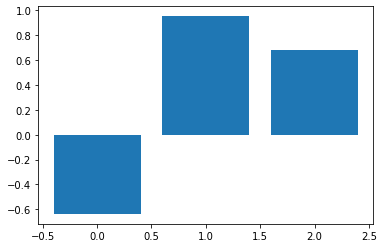

In [ ]:
from sklearn.datasets import make_regression
model = LinearRegression()
model.fit(x_test, y_test)
importance = model.coef_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Here we see that "High" is the feature with most importance.

In [ ]:
#how does Volume, High, Close and Low affect Close
dfdatesiz.head()
dfdatesiz.dropna(inplace=True)
features = ['Close', 'High', 'Low', 'Volume']
output_label = 'Open'
x_train, x_test, y_train, y_test = train_test_split(dfdatesiz[features], dfdatesiz[output_label], test_size = 0.2,random_state=0)

Feature: 0, Score: -0.71761
Feature: 1, Score: 1.14803
Feature: 2, Score: 0.55887
Feature: 3, Score: -0.00000


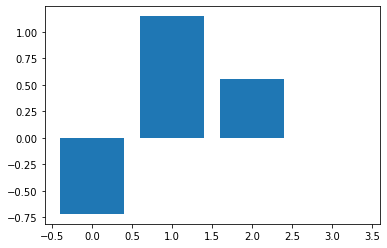

In [ ]:
from sklearn.datasets import make_regression
model = LinearRegression()
model.fit(x_test, y_test)
importance = model.coef_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

We find out that "Volume" alone doesnt really affect the Open of next day and "High" is the most important.

#### Machine Learning
```
1 Prediction of opening price for a single day given all data of previous 30 days
2 Perform hyper-parameter tuning to increase model performance
3 Create a simple recommendation system to decide whether to buy Bitcoin given the open and close
prices, as well as volume, of previous 30 days
4 Predict trends of all features (open, high, low, close, adj close, volume) for the future time span
from 09 March 2022 to 09 September 2022
5 Utilize at least four new features using additional datasets in machine learning models
```

1) Prediction of opening price for a single day given all data of previous 30 days

In [ ]:
bitcoin = pd.read_csv('./drive/My Drive/CS 210 Final Project/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

In [ ]:
bitcoin.isnull().sum()
bitcoin['Dates'] = pd.to_datetime(bitcoin['Timestamp'], unit='s')
bitcoin.head()
bitcoin.dropna(inplace=True)
features = ['Open', 'High', 'Low', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']
output_label = 'Close'
x_train, x_test, y_train, y_test = train_test_split(bitcoin[features], bitcoin[output_label], test_size = 0.2,random_state=0)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
future_set = bitcoin.shift(periods=30).tail(30)
prediction = model.predict(future_set[features])

In [ ]:
knn = KNeighborsRegressor(2)
dt = DecisionTreeRegressor()
rf = RandomForestRegressor(n_estimators=50)

knn.fit(x_train, y_train)
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=50)

Text(0, 0.5, '$ Price')

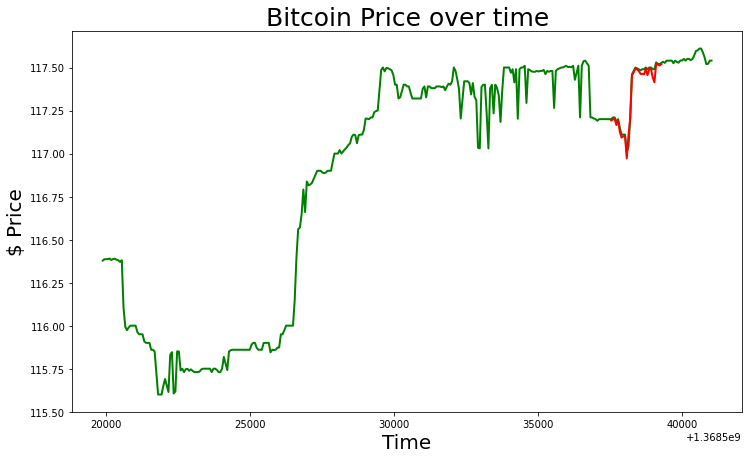

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(bitcoin["Timestamp"][-350:-1], bitcoin["Weighted_Price"][-350:-1], color='g', lw=2)
plt.plot(future_set["Timestamp"], prediction, color='r', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

In [ ]:
print(model.score(x_test,y_test))

0.9999506597861257


As we can see, our prediction is almost spot on with the real data.

2) Perform hyper-parameter tuning to increase model performance

In [ ]:
y_pred = knn.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("mse: {}".format(mse))
print("mae: {}".format(mae))
print("rmse: {}".format(rmse))

mse: 7.190889363686095
mae: 0.6994253530932961
rmse: 2.6815833687741457


In [ ]:
y_pred = dt.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("mse: {}".format(mse))
print("mae: {}".format(mae))
print("rmse: {}".format(rmse))

mse: 0.20231162721304954
mae: 0.09895365028844548
rmse: 0.44979064820541736


In [ ]:
y_pred = rf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("mse: {}".format(mse))
print("mae: {}".format(mae))
print("rmse: {}".format(rmse))

mse: 0.12173720949870705
mae: 0.083353202705401
rmse: 0.34890859762795623


Random Forest regressor is the most accurate one to use here, therefore we will be hyper-tuning that one.

In [ ]:
rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=4,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

rf.fit(x_train,y_train)
predictions_rf = rf.predict(x_test)
errors = abs(predictions_rf - y_test)

print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions_rf))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions_rf)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Mean Squared Error: 0.1197492773243568
Mean Absolute Error: 0.09151791156680081
Root Mean Squared Error: 0.34604808527769204


As we can see, hyper tuned Random Forest Regressor is a bit better than the default regressor.

4) Predict trends of all features (open, high, low, close, adj close, volume) for the future time span
from 09 March 2022 to 09 September 2022

In [ ]:
df_march=df.drop(range(2730,2755))

In [ ]:
df_march.info

<bound method DataFrame.info of             Date          Open          High           Low         Close  \
0     2014-09-17    465.864014    468.174011    452.421997    457.334015   
1     2014-09-18    456.859985    456.859985    413.104004    424.440002   
2     2014-09-19    424.102997    427.834991    384.532013    394.795990   
3     2014-09-20    394.673004    423.295990    389.882996    408.903992   
4     2014-09-21    408.084991    412.425995    393.181000    398.821014   
...          ...           ...           ...           ...           ...   
2725  2022-03-04  42458.140625  42479.613281  38805.847656  39137.605469   
2726  2022-03-05  39148.449219  39566.335938  38777.035156  39400.585938   
2727  2022-03-06  39404.199219  39640.175781  38211.648438  38419.984375   
2728  2022-03-07  38429.304688  39430.226563  37260.203125  38062.039063   
2729  2022-03-08  38059.902344  39304.441406  37957.386719  38737.269531   

         Adj Close       Volume  
0       457.334015   

In [ ]:
# Reindex data using a DatetimeIndex
df_march.set_index(pd.DatetimeIndex(df_march['Date']), inplace=True)

# Keep only the 'Adj Close' Value
df_march = df_march[['Adj Close']]

print(df_march)
df_march.info()

               Adj Close
Date                    
2014-09-17    457.334015
2014-09-18    424.440002
2014-09-19    394.795990
2014-09-20    408.903992
2014-09-21    398.821014
...                  ...
2022-03-04  39137.605469
2022-03-05  39400.585938
2022-03-06  38419.984375
2022-03-07  38062.039063
2022-03-08  38737.269531

[2730 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2730 entries, 2014-09-17 to 2022-03-08
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2730 non-null   float64
dtypes: float64(1)
memory usage: 42.7 KB


In [ ]:
# Add EMA to dataframe by appending
# our existing dataframe
df_march.ta.ema(close='Adj Close', length=10, append=True)


/usr/local/lib/python3.7/dist-packages/pandas_ta/core.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ind_name] = result


Date
2014-09-17             NaN
2014-09-18             NaN
2014-09-19             NaN
2014-09-20             NaN
2014-09-21             NaN
                  ...     
2022-03-04    40998.241401
2022-03-05    40707.758589
2022-03-06    40291.799641
2022-03-07    39886.388627
2022-03-08    39677.457882
Name: EMA_10, Length: 2730, dtype: float64

In [ ]:
df_march.head(10)

,Adj Close,EMA_10
Date,,
2014-09-17,457.334015,NaN
2014-09-18,424.440002,NaN
2014-09-19,394.795990,NaN
2014-09-20,408.903992,NaN
2014-09-21,398.821014,NaN
2014-09-22,402.152008,NaN
2014-09-23,435.790985,NaN
2014-09-24,423.204987,NaN
2014-09-25,411.574005,NaN


In [ ]:
#The first X EMA_X values will be NaN since EMA creates itself by averaging those X many values
#We get around this by dropping the first 10
df_march = df_march.iloc[10:]
df_march.head(10)

,Adj Close,EMA_10
Date,,
2014-09-27,399.519989,413.121615
2014-09-28,377.181000,406.586958
2014-09-29,375.467010,400.928785
2014-09-30,386.944000,398.386097
2014-10-01,383.614990,395.700441
2014-10-02,375.071991,391.949814
2014-10-03,359.511993,386.052028
2014-10-04,328.865997,375.654568
2014-10-05,320.510010,365.628285


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_march[['Adj Close']], df_march[['EMA_10']], test_size=.2)

print(X_test.describe())
print("\n")
print(X_train.describe())


          Adj Close
count    544.000000
mean   11740.280592
std    16789.771244
min      208.097000
25%      579.113998
50%     5614.524903
75%    10753.850830
max    64261.992188


          Adj Close
count   2176.000000
mean   11490.824602
std    16090.890842
min      178.102997
25%      617.881516
50%     6420.037353
75%    10600.732910
max    67566.828125


In [ ]:
modelx = LinearRegression()
modelx.fit(X_train, y_train)
y_pred = modelx.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("Model Coefficients:", modelx.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[0.99467339]]
Mean Absolute Error: 458.444987812971
Coefficient of Determination: 0.9962970538314578
